In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [8]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=492, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

new_df = fraud_df.append(not_fraud_df, ignore_index=True)

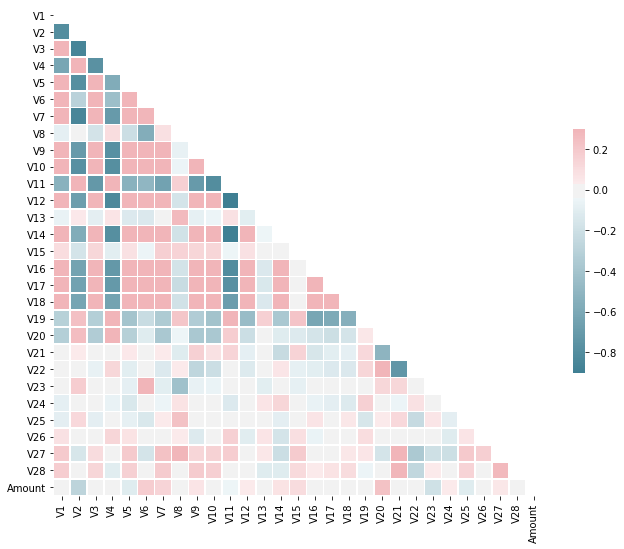

In [9]:
# Compute the correlation matrix
corr = new_df.drop(columns='Class').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
#defining our features and target variable
X = np.array(new_df.iloc[:, 0:29])
y = np.array(new_df['Class'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
#Feature scaling
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
#Classifying and prediction
classifier = LogisticRegression(random_state = 0)  #Logistic classifier
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)  #predicting test results

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126   1]
 [ 16 103]]


In [15]:
#using K-Fold cross validation to get the mean Accuracy
accuracies = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10)
print('Mean Accuracy: {0:.3f}, Std of Accuracy: {1:.3f}'.format(accuracies.mean(),accuracies.std()))

Mean Accuracy: 0.928, Std of Accuracy: 0.024


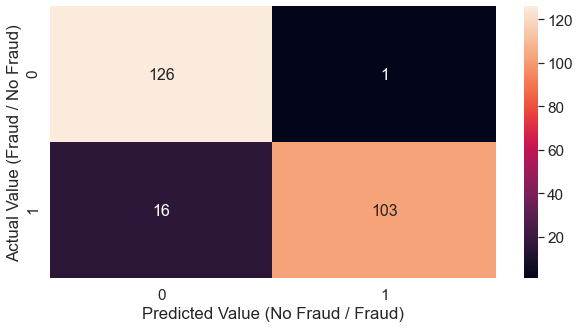

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,classifier.predict(X_test_scaled))
df_cm = pd.DataFrame(cm, range(2),range(2))

plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.ylabel('Actual Value (Fraud / No Fraud)')
plt.xlabel('Predicted Value (No Fraud / Fraud)')
plt.savefig('LogRegConfusionMatrix.png')